# VLOOKUP in Python (Part 1)
---

## **Excel:**

*   Joins data based on lookup_value
*   Cell function (shown below):


    =VLOOKUP(lookup_value, table_array, col_index_num, [range_lookup])

## **Python:**



*   Uses df.merge()


    df1.merge(df2, on='lookup_value')

<br>

### Load required packages and data
---

In [1]:
# Import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Lookup tables
from vega_datasets import data
people = data.lookup_people()
groups = data.lookup_groups()
groups.columns = ['group', 'name']

groups_small = groups[~groups['name'].isin(['Alan', 'Steve', 'Tom', 'Will'])]

groups_person = data.lookup_groups()
groups_person = groups_person[~groups_person['person'].isin(['Alan', 'Steve', 'Tom', 'Will'])]

gapminder = data.gapminder()
population = gapminder[gapminder['year'] == 2005][['country', 'pop']]
life_stats = gapminder[gapminder['year'] == 2005][['country', 'life_expect', 'fertility']].sort_values('country', ascending=False)
life_stats.columns = ['location', 'life_expectancy', 'fertility_rate']

<br>

# VLOOKUP
---

In [3]:
# View "people" dataframe
people.head()

,name,age,height
0,Alan,25,180
1,George,32,174
2,Fred,39,182
3,Steve,42,161
4,Nick,23,180


<br>

In [4]:
# View "groups" dataframe
groups.head()

,group,name
0,1,Alan
1,1,George
2,1,Fred
3,2,Steve
4,2,Nick


<br>

In [5]:
# Merge (VLOOKUP) the people and groups dataframes
people.merge(groups, on='name')

,name,age,height,group
0,Alan,25,180,1
1,George,32,174,1
2,Fred,39,182,1
3,Steve,42,161,2
4,Nick,23,180,2
5,Will,21,168,2
6,Cole,51,160,3
7,Rick,63,181,3
8,Tom,54,179,3


<br>

In [6]:
# Alan, Steve, Tom and Will left their groups. The "groups_small" dataframe includes the new groups. Merge it to the existing people dataframe
people.merge(groups_small, on='name')

,name,age,height,group
0,George,32,174,1
1,Fred,39,182,1
2,Nick,23,180,2
3,Cole,51,160,3
4,Rick,63,181,3


<br><br><br>

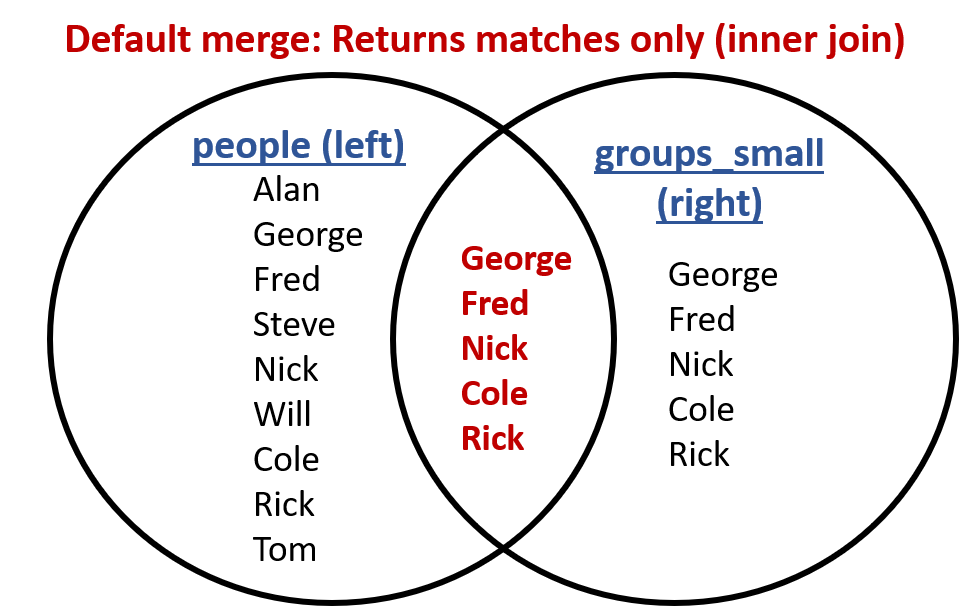

<br><br><br>

In [7]:
# Merge groups_small to people, but keep all the rows in people
people.merge(groups_small, on='name', how='left')

,name,age,height,group
0,Alan,25,180,NaN
1,George,32,174,1.0
2,Fred,39,182,1.0
3,Steve,42,161,NaN
4,Nick,23,180,2.0
5,Will,21,168,NaN
6,Cole,51,160,3.0
7,Rick,63,181,3.0
8,Tom,54,179,NaN


<br><br><br>

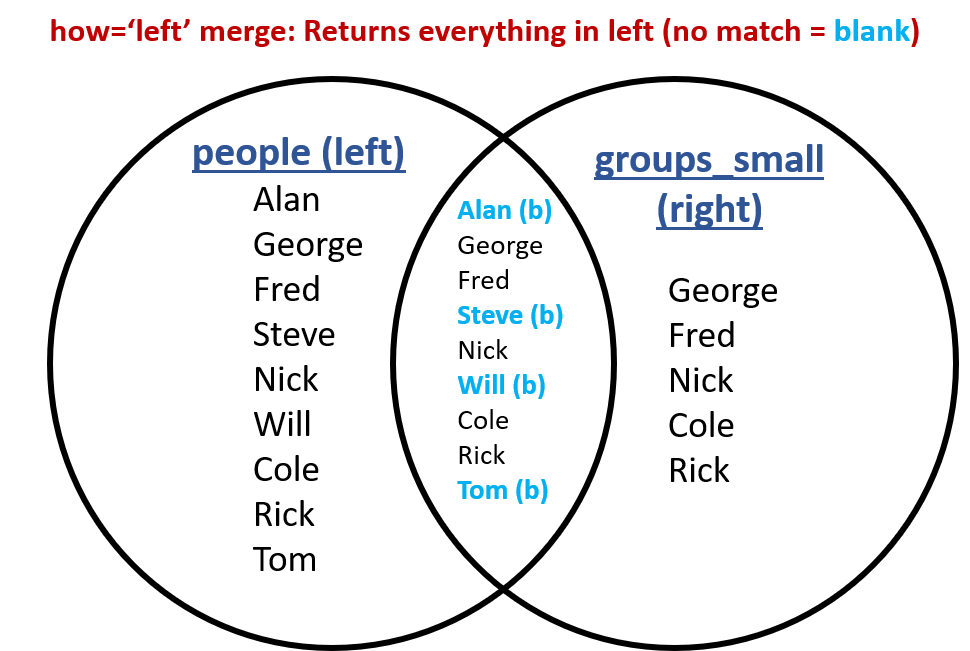

<br><br><br>

In [8]:
# Show table source with indicator=True
people.merge(groups_small, on='name', how='left', indicator=True)

,name,age,height,group,_merge
0,Alan,25,180,NaN,left_only
1,George,32,174,1.0,both
2,Fred,39,182,1.0,both
3,Steve,42,161,NaN,left_only
4,Nick,23,180,2.0,both
5,Will,21,168,NaN,left_only
6,Cole,51,160,3.0,both
7,Rick,63,181,3.0,both
8,Tom,54,179,NaN,left_only


<br><br>

In [9]:
# Merge (VLOOKUP) the people and groups_person dataframes (view groups_person)
groups_person.head()

,group,person
1,1,George
2,1,Fred
4,2,Nick
6,3,Cole
7,3,Rick


<br>

In [10]:
# Merge (VLOOKUP) the people and groups_person dataframes
people.merge(groups_person, how='left', left_on='name', right_on='person')

,name,age,height,group,person
0,Alan,25,180,NaN,NaN
1,George,32,174,1.0,George
2,Fred,39,182,1.0,Fred
3,Steve,42,161,NaN,NaN
4,Nick,23,180,2.0,Nick
5,Will,21,168,NaN,NaN
6,Cole,51,160,3.0,Cole
7,Rick,63,181,3.0,Rick
8,Tom,54,179,NaN,NaN


<br><br>
**QUICK CHALLENGE #1:**

**Task: Join the `life_expectancy` and `fertility_rate` columns to the `population` dataframe**

* Use merge() to perform a VLOOKUP on `population` dataframe
* Pull data from the `life_stats` dataframe
* Use a left join

In [11]:
# Your code for quick challenge #1 here:
population.head()

,country,pop
10,Afghanistan,29928987
21,Argentina,39537943
32,Aruba,71566
43,Australia,20090437
54,Austria,8184691


In [12]:
life_stats.head()

,location,life_expectancy,fertility_rate
692,Venezuela,73.747,2.547
681,United States,78.242,2.054
670,United Kingdom,79.425,1.815
659,Turkey,71.777,2.143
648,Switzerland,81.701,1.420


In [13]:
population.merge(life_stats, how='left', left_on='country', right_on='location')

,country,pop,location,life_expectancy,fertility_rate
0,Afghanistan,29928987,Afghanistan,43.828,7.0685
1,Argentina,39537943,Argentina,75.320,2.2540
2,Aruba,71566,Aruba,74.239,2.0400
3,Australia,20090437,Australia,81.235,1.7880
4,Austria,8184691,Austria,79.829,1.4200
...,...,...,...,...,...
58,Switzerland,7489370,Switzerland,81.701,1.4200
59,Turkey,69660559,Turkey,71.777,2.1430
60,United Kingdom,60441457,United Kingdom,79.425,1.8150
61,United States,295734134,United States,78.242,2.0540
